In [6]:
import sys
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
PROJECT_ROOT = Path("..").resolve()
SRC_DIR = PROJECT_ROOT / "src"
sys.path.append(str(SRC_DIR))
from preprocess import load_and_preprocess , DEFAULT_TARGET_COL

In [15]:
data_path = PROJECT_ROOT / "data" / "heart.csv"
df , X,y,features_cols = load_and_preprocess(data_path,target_col=DEFAULT_TARGET_COL)
print(df.shape,X.shape,y.shape)
print("Target balance:\n", y.value_counts(normalize=True))

(303, 14) (303, 16) (303,)
Target balance:
 target
1    0.544554
0    0.455446
Name: proportion, dtype: float64


In [16]:
from sklearn.model_selection import train_test_split
X_train , X_test,y_train,y_test =train_test_split(
    X,y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
print("X_train:", X_train.shape,"X_test",X_test.shape)
print("y_train balance:\n", y_train.value_counts(normalize=True))
print("y_test balance:\n", y_test.value_counts(normalize=True))


X_train: (242, 16) X_test (61, 16)
y_train balance:
 target
1    0.545455
0    0.454545
Name: proportion, dtype: float64
y_test balance:
 target
1    0.540984
0    0.459016
Name: proportion, dtype: float64


In [17]:
print(y.value_counts(normalize=True))
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))


target
1    0.544554
0    0.455446
Name: proportion, dtype: float64
target
1    0.545455
0    0.454545
Name: proportion, dtype: float64
target
1    0.540984
0    0.459016
Name: proportion, dtype: float64


In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

logreg_pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=2000))
])

logreg_pipe.fit(X_train, y_train)


,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


In [19]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    average_precision_score
)

In [20]:
y_pred = logreg_pipe.predict(X_test)
y_proba = logreg_pipe.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
pr_auc = average_precision_score(y_test, y_proba)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", acc)
print("ROC-AUC:", roc_auc)
print("PR-AUC (Average Precision):", pr_auc)

print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8032786885245902
ROC-AUC: 0.8690476190476191
PR-AUC (Average Precision): 0.8769698130080976

Confusion Matrix:
 [[19  9]
 [ 3 30]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.68      0.76        28
           1       0.77      0.91      0.83        33

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61



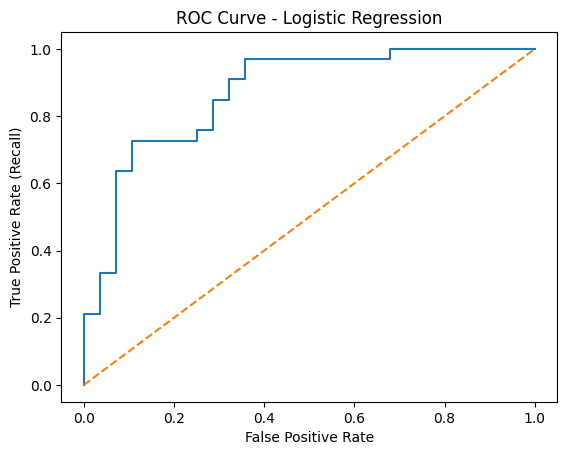

In [21]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve - Logistic Regression")
plt.show()


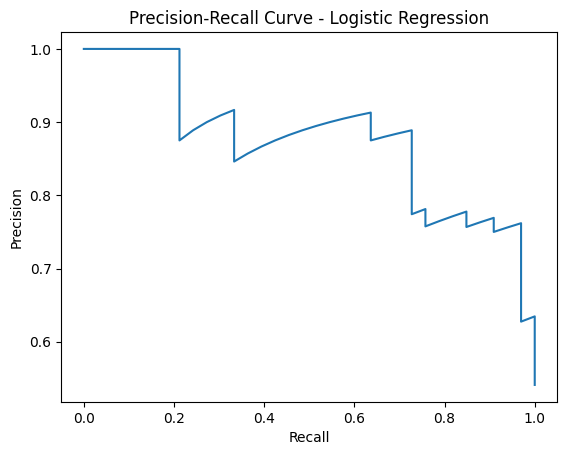

In [22]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds_pr = precision_recall_curve(y_test, y_proba)

plt.figure()
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Logistic Regression")
plt.show()


In [23]:
from sklearn.metrics import precision_score, recall_score, f1_score

for t in [0.3, 0.5, 0.7]:
    y_pred_t = (y_proba >= t).astype(int)

    p = precision_score(y_test, y_pred_t)
    r = recall_score(y_test, y_pred_t)
    f1 = f1_score(y_test, y_pred_t)
    cm_t = confusion_matrix(y_test, y_pred_t)

    print(f"\nThreshold = {t}")
    print("Precision:", round(p, 3))
    print("Recall:", round(r, 3))
    print("F1:", round(f1, 3))
    print("Confusion Matrix:\n", cm_t)



Threshold = 0.3
Precision: 0.756
Recall: 0.939
F1: 0.838
Confusion Matrix:
 [[18 10]
 [ 2 31]]

Threshold = 0.5
Precision: 0.769
Recall: 0.909
F1: 0.833
Confusion Matrix:
 [[19  9]
 [ 3 30]]

Threshold = 0.7
Precision: 0.8
Recall: 0.727
F1: 0.762
Confusion Matrix:
 [[22  6]
 [ 9 24]]
